# Develop a regression model to accurately predict readmission rates by understanding factors that drive hospital readmissions


In [1]:
# We first need to analyse the dataset thoroughly and
# identify what the most important features are for Regression

In [2]:
# This script loads necessary libraries for data preprocessing, visualization, and machine learning,  
# including regression, classification, feature selection, and model evaluation.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, accuracy_score
#pip install statsmodels
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
#!pip install shap
#import shap


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# Loading the HRRP dataset

file_path = "FY_2025_Hospital_Readmissions_Reduction_Program_Hospital.csv"
df = pd.read_csv(file_path)
df

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,296.0,NaN,0.9483,13.0146,13.7235,36,07/01/2020,06/30/2023
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,151.0,NaN,0.9509,9.6899,10.1898,13,07/01/2020,06/30/2023
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,681.0,NaN,1.0597,21.5645,20.3495,151,07/01/2020,06/30/2023
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.9654,4.2680,4.4211,Too Few to Report,07/01/2020,06/30/2023
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,490.0,NaN,0.9715,16.1137,16.5863,77,07/01/2020,06/30/2023
...,...,...,...,...,...,...,...,...,...,...,...,...
18505,EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK,670327,TX,READM-30-HIP-KNEE-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2020,06/30/2023
18506,EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK,670327,TX,READM-30-HF-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2020,06/30/2023
18507,EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK,670327,TX,READM-30-COPD-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2020,06/30/2023
18508,EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK,670327,TX,READM-30-CABG-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2020,06/30/2023


In [4]:
# Removing inconsequential features like 'Start Date' & 'End Date' 

dfd = df[['Facility ID', 'Measure Name','Number of Discharges', 'Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions']]

In [5]:
# Data Exploration

In [6]:
# Understanding the data types

dfd.dtypes

Facility ID                     int64
Measure Name                   object
Number of Discharges          float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions         object
dtype: object

In [7]:
# Finding the percentage of missing values of each feature

print(dfd.isna().mean()*100)

Facility ID                    0.000000
Measure Name                   0.000000
Number of Discharges          54.943274
Excess Readmission Ratio      35.564560
Predicted Readmission Rate    35.564560
Expected Readmission Rate     35.564560
Number of Readmissions        35.564560
dtype: float64


In [8]:
df

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,296.0,NaN,0.9483,13.0146,13.7235,36,07/01/2020,06/30/2023
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,151.0,NaN,0.9509,9.6899,10.1898,13,07/01/2020,06/30/2023
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,681.0,NaN,1.0597,21.5645,20.3495,151,07/01/2020,06/30/2023
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.9654,4.2680,4.4211,Too Few to Report,07/01/2020,06/30/2023
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,490.0,NaN,0.9715,16.1137,16.5863,77,07/01/2020,06/30/2023
...,...,...,...,...,...,...,...,...,...,...,...,...
18505,EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK,670327,TX,READM-30-HIP-KNEE-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2020,06/30/2023
18506,EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK,670327,TX,READM-30-HF-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2020,06/30/2023
18507,EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK,670327,TX,READM-30-COPD-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2020,06/30/2023
18508,EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK,670327,TX,READM-30-CABG-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2020,06/30/2023


In [9]:
# Converting 'Number of Readmissions' from an object to a float (categorical variable to numerical variable)

dfd['Number of Readmissions'] = pd.to_numeric(dfd['Number of Readmissions'], errors='coerce')

/tmp/ipykernel_374/1129109492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['Number of Readmissions'] = pd.to_numeric(dfd['Number of Readmissions'], errors='coerce')


In [10]:
dfd

,Facility ID,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
0,10001,READM-30-AMI-HRRP,296.0,0.9483,13.0146,13.7235,36.0
1,10001,READM-30-CABG-HRRP,151.0,0.9509,9.6899,10.1898,13.0
2,10001,READM-30-HF-HRRP,681.0,1.0597,21.5645,20.3495,151.0
3,10001,READM-30-HIP-KNEE-HRRP,NaN,0.9654,4.2680,4.4211,NaN
4,10001,READM-30-PN-HRRP,490.0,0.9715,16.1137,16.5863,77.0
...,...,...,...,...,...,...,...
18505,670327,READM-30-HIP-KNEE-HRRP,NaN,NaN,NaN,NaN,NaN
18506,670327,READM-30-HF-HRRP,NaN,NaN,NaN,NaN,NaN
18507,670327,READM-30-COPD-HRRP,NaN,NaN,NaN,NaN,NaN
18508,670327,READM-30-CABG-HRRP,NaN,NaN,NaN,NaN,NaN


In [11]:
# Removing NaN value rows

dfd_dna = dfd.dropna()
dfd_dna

,Facility ID,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
0,10001,READM-30-AMI-HRRP,296.0,0.9483,13.0146,13.7235,36.0
1,10001,READM-30-CABG-HRRP,151.0,0.9509,9.6899,10.1898,13.0
2,10001,READM-30-HF-HRRP,681.0,1.0597,21.5645,20.3495,151.0
4,10001,READM-30-PN-HRRP,490.0,0.9715,16.1137,16.5863,77.0
5,10001,READM-30-COPD-HRRP,130.0,0.9330,15.4544,16.5637,16.0
...,...,...,...,...,...,...,...
18356,670122,READM-30-HF-HRRP,656.0,1.0197,22.3444,21.9129,148.0
18357,670122,READM-30-COPD-HRRP,120.0,1.0179,19.8986,19.5481,25.0
18358,670122,READM-30-CABG-HRRP,100.0,1.1076,10.6921,9.6535,14.0
18359,670122,READM-30-AMI-HRRP,136.0,0.9751,14.1385,14.4991,18.0


In [12]:
# Converting the categorical variable 'Measure Name' to numerical variables (0/1) required for ML models 

dfdv = pd.get_dummies(dfd_dna)
dfdv

,Facility ID,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Measure Name_READM-30-AMI-HRRP,Measure Name_READM-30-CABG-HRRP,Measure Name_READM-30-COPD-HRRP,Measure Name_READM-30-HF-HRRP,Measure Name_READM-30-HIP-KNEE-HRRP,Measure Name_READM-30-PN-HRRP
0,10001,296.0,0.9483,13.0146,13.7235,36.0,True,False,False,False,False,False
1,10001,151.0,0.9509,9.6899,10.1898,13.0,False,True,False,False,False,False
2,10001,681.0,1.0597,21.5645,20.3495,151.0,False,False,False,True,False,False
4,10001,490.0,0.9715,16.1137,16.5863,77.0,False,False,False,False,False,True
5,10001,130.0,0.9330,15.4544,16.5637,16.0,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
18356,670122,656.0,1.0197,22.3444,21.9129,148.0,False,False,False,True,False,False
18357,670122,120.0,1.0179,19.8986,19.5481,25.0,False,False,True,False,False,False
18358,670122,100.0,1.1076,10.6921,9.6535,14.0,False,True,False,False,False,False
18359,670122,136.0,0.9751,14.1385,14.4991,18.0,True,False,False,False,False,False


In [13]:
dfdv.dtypes

Facility ID                              int64
Number of Discharges                   float64
Excess Readmission Ratio               float64
Predicted Readmission Rate             float64
Expected Readmission Rate              float64
Number of Readmissions                 float64
Measure Name_READM-30-AMI-HRRP            bool
Measure Name_READM-30-CABG-HRRP           bool
Measure Name_READM-30-COPD-HRRP           bool
Measure Name_READM-30-HF-HRRP             bool
Measure Name_READM-30-HIP-KNEE-HRRP       bool
Measure Name_READM-30-PN-HRRP             bool
dtype: object

In [14]:
dfdv.describe()

,Facility ID,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,8121.000000,8121.00000,8121.000000,8121.000000,8121.000000,8121.000000
mean,256179.848295,286.80101,1.009233,16.696794,16.549613,48.074868
std,155404.795012,265.54472,0.078230,3.862805,3.656800,48.488707
min,10001.000000,25.00000,0.477900,1.674200,2.892100,11.000000
25%,110042.000000,120.00000,0.963500,14.701200,14.779000,19.000000
50%,250001.000000,203.00000,1.007200,17.258700,17.185500,31.000000
75%,390001.000000,361.00000,1.052700,19.324900,19.200500,59.000000
max,670260.000000,4501.00000,1.643000,27.809500,25.394200,877.000000


## Multiple Linear Regression Model

In [15]:
# Define the target variable
y = dfdv['Number of Readmissions']

# Define the independent variables by dropping the target from the dataframe
X = dfdv.drop(['Number of Readmissions','Expected Readmission Rate','Measure Name_READM-30-PN-HRRP', 'Predicted Readmission Rate', 'Excess Readmission Ratio'], axis=1)

'''
1.#X = dfdv.drop(['Number of Readmissions'], axis=1)
2.#X = dfdv.drop(['Number of Readmissions','Expected Readmission Rate','Measure Name_READM-30-PN-HRRP', 'Predicted Readmission Rate'], axis=1)
'''

# Identify boolean and non-boolean columns
bool_cols = X.select_dtypes(include=['bool'])
num_cols = X.select_dtypes(exclude=['bool'])

# Scale only numerical columns 
scaler = StandardScaler()
X_scaled_num = pd.DataFrame(scaler.fit_transform(num_cols), columns=num_cols.columns)

# Reattach boolean columns without scaling
X_scaled = pd.concat([X_scaled_num, bool_cols.reset_index(drop=True)], axis=1)

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialise the Linear Regression model
model = LinearRegression()

# Fit the model to the training data~
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Iterative feature selection is conducted based on a trade-off of the following metrics

In [17]:
# Identify multicollinearity of independent variable using Variance Inflation Factor (VIF<5)

X_vif = X.astype(float)

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()

# Assign the column names of X_vif to the 'Feature' column in vif_data
vif_data['Feature'] = X_vif.columns

# Calculate the VIF for each feature and store in the 'VIF' column
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Print the VIF data
print(vif_data)

                               Feature       VIF
0                          Facility ID  2.439350
1                 Number of Discharges  1.953314
2       Measure Name_READM-30-AMI-HRRP  1.247019
3      Measure Name_READM-30-CABG-HRRP  1.080252
4      Measure Name_READM-30-COPD-HRRP  1.284515
5        Measure Name_READM-30-HF-HRRP  1.650422
6  Measure Name_READM-30-HIP-KNEE-HRRP  1.111196


/tmp/ipykernel_374/2370313955.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="VIF", y="Feature", data=vif_data, palette="viridis")


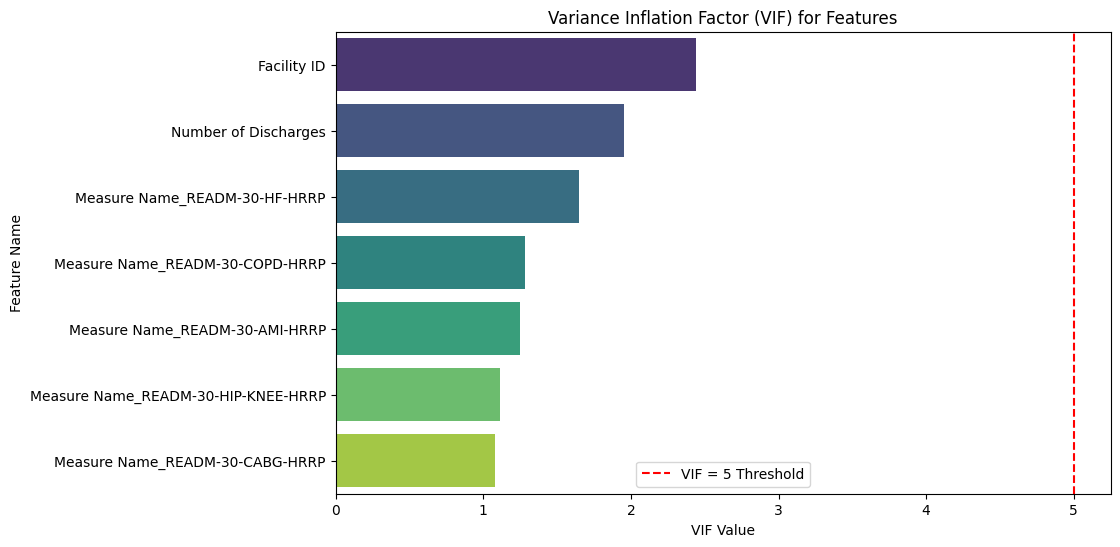

In [18]:
# Visualising the VIF <5 to prevent multicollinearity of independent variables within the model

X_vif = X.astype(float)

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Sort the VIF values in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Plot the VIF values using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="Feature", data=vif_data, palette="viridis")
plt.title("Variance Inflation Factor (VIF) for Features")
plt.xlabel("VIF Value")
plt.ylabel("Feature Name")
plt.axvline(x=5, color='red', linestyle='--', label="VIF = 5 Threshold")
plt.legend()
plt.show()

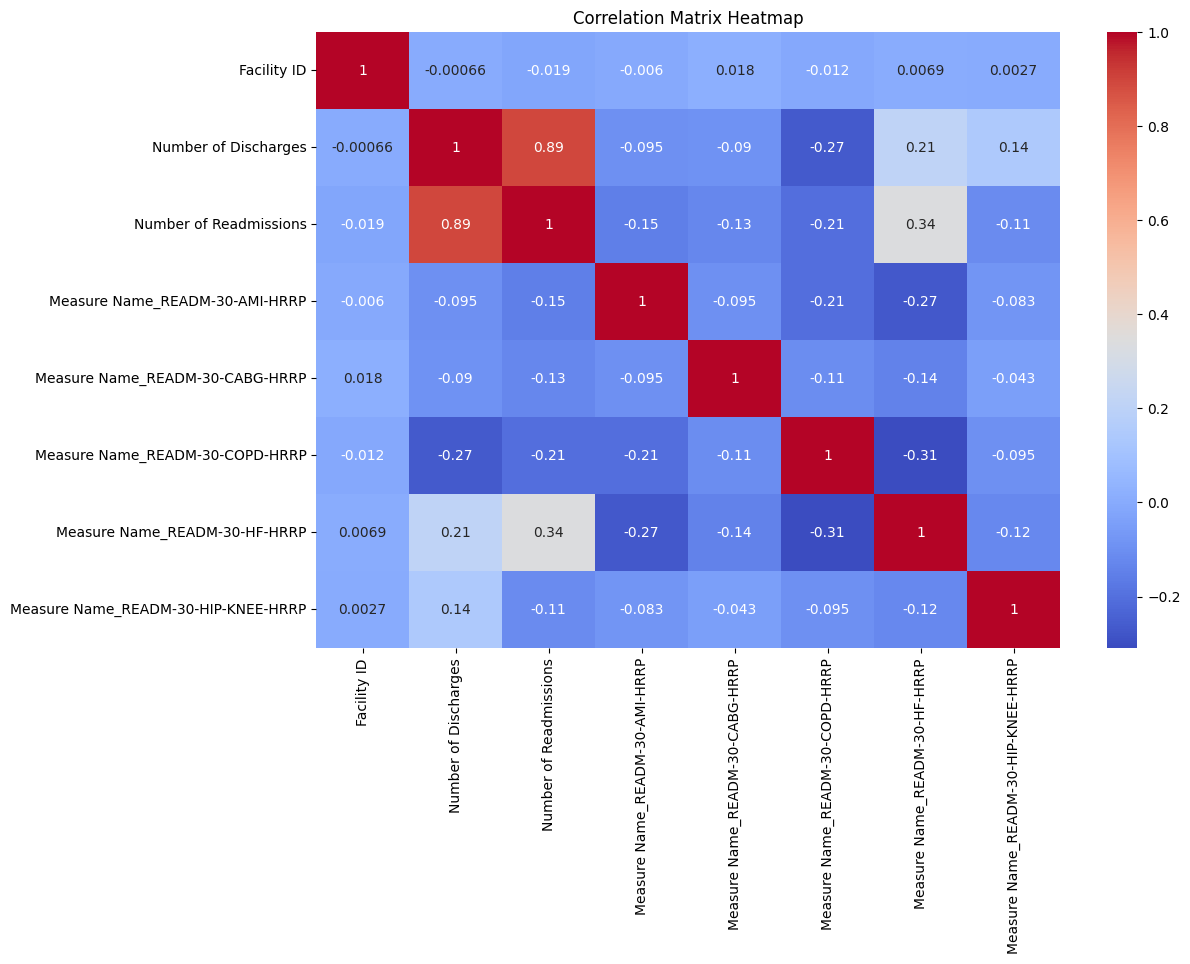

In [19]:
# Plotting a correlation matrix heatmape to observe correlations of features in the filtered dataset 

dfdv_corr = dfdv.drop(['Expected Readmission Rate','Measure Name_READM-30-PN-HRRP', 'Predicted Readmission Rate', 'Excess Readmission Ratio'], axis=1)
corr_matrix = dfdv_corr.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()



In [20]:
# Show the correlations of features to the target variable 'Number of Readmissions'

corr_matrix["Number of Readmissions"].sort_values(ascending=False)

Number of Readmissions                 1.000000
Number of Discharges                   0.894155
Measure Name_READM-30-HF-HRRP          0.337725
Facility ID                           -0.019319
Measure Name_READM-30-HIP-KNEE-HRRP   -0.109960
Measure Name_READM-30-CABG-HRRP       -0.128906
Measure Name_READM-30-AMI-HRRP        -0.151007
Measure Name_READM-30-COPD-HRRP       -0.205387
Name: Number of Readmissions, dtype: float64

In [21]:
# Get model coefficients
coefficients = model.coef_
feature_names = X_scaled.columns  # Use X_scaled to match processed features

# Display coefficients
for feature_name, coef in zip(feature_names, coefficients):
    print(f'Coefficient for {feature_name}: {coef:.6f}')

Coefficient for Facility ID: -0.833104
Coefficient for Number of Discharges: 42.825696
Coefficient for Measure Name_READM-30-AMI-HRRP: -7.172396
Coefficient for Measure Name_READM-30-CABG-HRRP: -10.100156
Coefficient for Measure Name_READM-30-COPD-HRRP: 3.340034
Coefficient for Measure Name_READM-30-HF-HRRP: 11.907601
Coefficient for Measure Name_READM-30-HIP-KNEE-HRRP: -59.897592


In [22]:
# Model prediction and metrics for Test

y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)

# Model prediction and metrics for Train

y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)


print(f'r2_train={r2_train}, rmse_train={rmse_train} & r2_test={r2_test} and rmse_test={rmse_test}')

r2_train=0.86167281337373, rmse_train=17.56874766348026 & r2_test=0.9240022351930796 and rmse_test=14.657299999091583


In [23]:
# Conducting cross-validation 

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Average Cross-Validation R² Score: {np.mean(cv_scores)}')

Cross-Validation R² Scores: [0.88225591 0.90839884 0.88276165 0.81211365 0.89241634]
Average Cross-Validation R² Score: 0.8755892790959414


In [24]:
# Retrieving cross-validation RMSE of model

y_pred = cross_val_predict(model, X, y, cv=5)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"RMSE: {rmse:.4f}")

RMSE: 17.2498


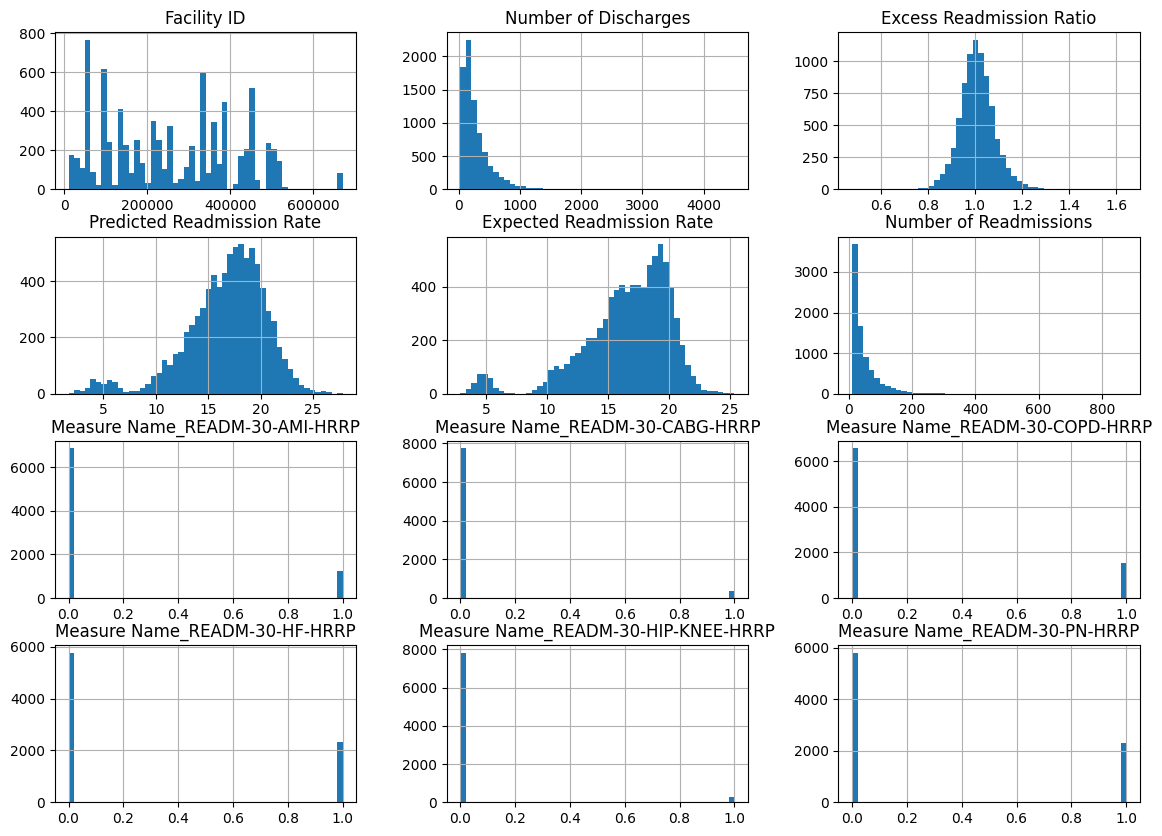

In [25]:
# plot histograms of the features with matplotlib to see their distributions

# Define a dictionary with columns and their target data types
dtype_changes = {
    'Number of Discharges': float,
    'Excess Readmission Ratio': float,
    'Predicted Readmission Rate': float,
    'Expected Readmission Rate': float,
    'Number of Readmissions': float,
    'Measure Name_READM-30-AMI-HRRP': float,
    'Measure Name_READM-30-CABG-HRRP': float,
    'Measure Name_READM-30-COPD-HRRP': float,
    'Measure Name_READM-30-HF-HRRP': float,
    'Measure Name_READM-30-HIP-KNEE-HRRP': float,
    'Measure Name_READM-30-PN-HRRP': float
}

# Apply the data type conversion 
dfdv_hist = dfdv.astype(dtype_changes)
dfdv_hist.dtypes

dfdv_hist.hist(bins=50, figsize=(14, 10))
plt.show()

## Decision Trees Regression Model

In [26]:
# Define the target variable 
y = dfdv['Number of Readmissions']

# Define feature matrix by dropping the target and unwanted columns
X = dfdv.drop(['Number of Readmissions', 'Expected Readmission Rate', 'Measure Name_READM-30-PN-HRRP', 'Predicted Readmission Rate', 'Excess Readmission Ratio'], axis=1)

# Convert features to integer if necessary
X = X.astype(float)

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

# ========== DECISION TREE REGRESSOR ==========
dt_model = DecisionTreeRegressor(random_state=100, max_depth = 5)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predictions and evaluation for test set
y_pred_test_dt = dt_model.predict(X_test)
r2_test_dt = r2_score(y_test, y_pred_test_dt)
rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_pred_test_dt))

# Predictions and evaluation for train set
y_pred_train_dt = dt_model.predict(X_train)
r2_train_dt = r2_score(y_train, y_pred_train_dt)
rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_pred_train_dt))

print(f"Decision Tree -> r2_train: {r2_train_dt}, rmse_train: {rmse_train_dt} & r2_test: {r2_test_dt}, rmse_test: {rmse_test_dt}")




Decision Tree -> r2_train: 0.9344230663833979, rmse_train: 12.6254567103725 & r2_test: 0.9082763946012474, rmse_test: 13.64984177964714


In [27]:
cv_scores_dt = cross_val_score(dt_model, X_scaled, y, cv=5, scoring='r2')
y_pred_cv_dt = cross_val_predict(dt_model, X_scaled, y, cv=5)
rmse_cv_dt = np.sqrt(mean_squared_error(y, y_pred_cv_dt))

print(f"Decision Tree -> Cross-Validation R² Scores: {cv_scores_dt}")
print(f"Decision Tree -> Average Cross-Validation R² Score: {np.mean(cv_scores_dt)}")
print(f"Decision Tree -> RMSE (Cross-Val): {rmse_cv_dt:.4f}")

Decision Tree -> Cross-Validation R² Scores: [0.90481897 0.92061013 0.91154618 0.8985505  0.90842185]
Decision Tree -> Average Cross-Validation R² Score: 0.9087895245645841
Decision Tree -> RMSE (Cross-Val): 14.6740


## Random Forest Regression Model

In [28]:
# Random Forest Regression

y = dfdv['Number of Readmissions']

# Define feature matrix by dropping the target and unwanted columns
X = dfdv.drop(['Number of Readmissions', 'Expected Readmission Rate', 'Measure Name_READM-30-PN-HRRP', 'Predicted Readmission Rate', 'Excess Readmission Ratio'], axis=1)

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

rf_model = RandomForestRegressor(n_estimators=100, random_state=100)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predictions and evaluation for test set
y_pred_test_rf = rf_model.predict(X_test)
r2_test_rf = r2_score(y_test, y_pred_test_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

# Predictions and evaluation for train set
y_pred_train_rf = rf_model.predict(X_train)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))

print(f"Random Forest -> r2_train: {r2_train_rf}, rmse_train: {rmse_train_rf} & r2_test: {r2_test_rf}, rmse_test: {rmse_test_rf}")


Random Forest -> r2_train: 0.9896869113368882, rmse_train: 5.006865445125436 & r2_test: 0.9402867285979317, rmse_test: 11.013427343300261


In [29]:
X.columns

Index(['Facility ID', 'Number of Discharges', 'Measure Name_READM-30-AMI-HRRP',
       'Measure Name_READM-30-CABG-HRRP', 'Measure Name_READM-30-COPD-HRRP',
       'Measure Name_READM-30-HF-HRRP', 'Measure Name_READM-30-HIP-KNEE-HRRP'],
      dtype='object')

In [30]:
# Random Forest Regression Cross-validation Metrics
cv_scores_rf = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='r2')
y_pred_cv_rf = cross_val_predict(rf_model, X_scaled, y, cv=5)
rmse_cv_rf = np.sqrt(mean_squared_error(y, y_pred_cv_rf))

print(f"Random Forest -> Cross-Validation R² Scores: {cv_scores_rf}")
print(f"Random Forest -> Average Cross-Validation R² Score: {np.mean(cv_scores_rf)}")
print(f"Random Forest -> RMSE (Cross-Val): {rmse_cv_rf:.4f}")

Random Forest -> Cross-Validation R² Scores: [0.92077097 0.94648395 0.93568448 0.92086292 0.93520723]
Random Forest -> Average Cross-Validation R² Score: 0.9318019097319263
Random Forest -> RMSE (Cross-Val): 12.7437
